In [1]:
#%matplotlib notebook
import os, time, sys
import importlib
import tables as tb
import matplotlib.pyplot as plt
import numpy as np
import panda2.panda2 as panda2

import panda2.analysis.fitfunctions as fitfunc
import panda2.scans.injection_scan as injection_scan

datdir = '/home/hzhang/workspace/tmp/panda2-daq/kit-gitlab/output/injection_scan'

def plot_data(list_fraw):
    for i, fraw in enumerate(list_fraw):
        fname = os.path.basename(fraw)
        fhit = fraw[:-7] + 'hit.h5'
        ## get data from hit file (event_data)
        with tb.open_file(fhit) as f:
            dat = f.root.event_data[:]
        ## get data from raw data (scan_parameters)
        with tb.open_file(fraw) as f:
            param = f.root.scan_parameters[:]

        ## select hits from comparator1
        dat1 = dat[dat['comp']==1]
        if len(dat1)!=0:
        #print(dat1)
            uni, idx = np.unique(dat1['timestamp'], return_index=True)
            dat1 = dat1[idx]
            nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))
            
            fit = fitfunc.fit_scurve(param['inj'], nhit1, reverse=False)
            x = np.linspace(np.min(param['inj']), np.max(param['inj']), num=100)
            label ='{0:s}_{1:.3f}'.format(fname.split('_')[1], fit[1])
            plt.plot(x, fitfunc.scurve(x,*fit[:3]), 'C{}-'.format(i))
            plt.plot(param['inj'], nhit1, 'C{}.'.format(i), label=label)


    ## show x-axis and y-axis and legend
    plt.xlabel('Injection[V]')
    plt.ylabel('#')
    plt.legend()

In [296]:
for fname in (np.sort(os.listdir(datdir))):
    if fname[-7:] == 'scan.h5':
        print(fname)

20240314_110335_injection_scan.h5
20240314_113756_injection_scan.h5
20240314_115340_injection_scan.h5
20240314_115519_injection_scan.h5
20240314_115621_injection_scan.h5
20240314_115744_injection_scan.h5
20240314_115803_injection_scan.h5
20240314_115821_injection_scan.h5
20240314_120444_injection_scan.h5
20240314_120507_injection_scan.h5
20240314_120530_injection_scan.h5
20240314_120941_injection_scan.h5
20240314_121722_injection_scan.h5
20240314_121919_injection_scan.h5
20240314_122241_injection_scan.h5
20240314_122625_injection_scan.h5
20240314_122831_injection_scan.h5
20240314_122922_injection_scan.h5
20240314_123615_injection_scan.h5
20240314_123718_injection_scan.h5
20240314_123755_injection_scan.h5
20240314_123816_injection_scan.h5
20240314_123837_injection_scan.h5
20240314_123856_injection_scan.h5
20240314_123916_injection_scan.h5
20240314_123941_injection_scan.h5
20240314_124017_injection_scan.h5
20240314_124121_injection_scan.h5
20240314_124222_injection_scan.h5
20240314_12425

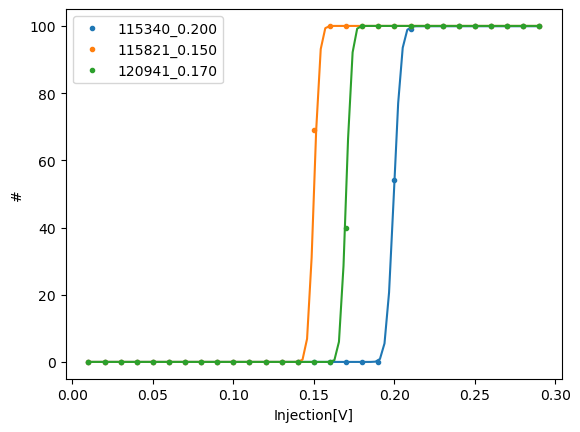

In [242]:
list_fraw = []

# col14 row30
#list_fraw.append(os.path.join(datdir, '20240314_113756_injection_scan.h5'))  #TDAC=0 
#list_fraw.append(os.path.join(datdir, '20240314_110335_injection_scan.h5'))  #TDAC=7 IPDAC=8 VNComp1=10

# col14 row31
list_fraw.append(os.path.join(datdir, '20240314_115340_injection_scan.h5'))  #TDAC=0  max


# col14 row32
#list_fraw.append(os.path.join(datdir, '20240314_115621_injection_scan.h5'))  #TDAC=0 


# col15 row30
#list_fraw.append(os.path.join(datdir, '20240314_115744_injection_scan.h5'))  #TDAC=0 

# col15 row31
#list_fraw.append(os.path.join(datdir, '20240314_115803_injection_scan.h5'))  #TDAC=0 

# col15 row32
list_fraw.append(os.path.join(datdir, '20240314_115821_injection_scan.h5'))  #TDAC=0  min
list_fraw.append(os.path.join(datdir, '20240314_120941_injection_scan.h5'))  #TDAC=7


# col16 row30
#list_fraw.append(os.path.join(datdir, '20240314_120444_injection_scan.h5'))  #TDAC=0 

# col16 row31
#list_fraw.append(os.path.join(datdir, '20240314_120507_injection_scan.h5'))  #TDAC=0 
#list_fraw.append(os.path.join(datdir, '20240314_122241_injection_scan.h5'))  #TDAC=3

# col16 row32
#list_fraw.append(os.path.join(datdir, '20240314_120530_injection_scan.h5'))  #TDAC=0 
#list_fraw.append(os.path.join(datdir, '20240314_121722_injection_scan.h5'))  #TDAC=7
#list_fraw.append(os.path.join(datdir, '20240314_121919_injection_scan.h5'))  #TDAC=3


plot_data(list_fraw)




(0.0, 0.7)

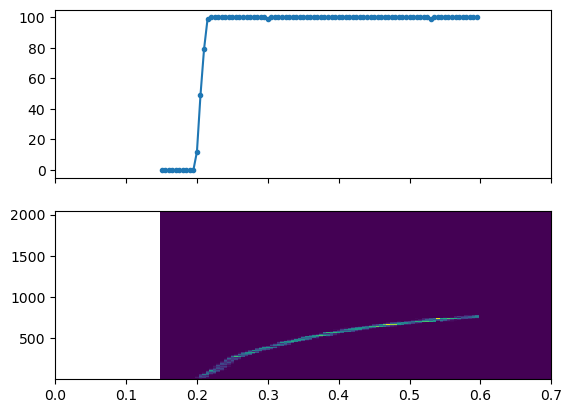

In [298]:
## get data from hit file (event_data)
#fname = os.path.basename(fraw)
fraw = os.path.join(datdir,'20240315_123118_injection_scan.h5')
fhit = fraw[:-7] + 'hit.h5'

with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
## get data from raw data (scan_parameters)
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

## select hits from comparator1
dat1 = dat[dat['comp']==1]
nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))

fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
ax[0].plot(param['inj'], nhit1, '.-')

xbins = np.arange(param['inj'][0]-(param['inj'][-1]-param['inj'][-2])/2, 
                  param['inj'][-1]+(param['inj'][-1]+param['inj'][-2])/2,
                  param['inj'][-1]-param['inj'][-2])
                  

ax[1].hist2d(param[dat1['event_number']]['inj'], dat1['tot'], 
           bins=[xbins, np.arange(1, 2048,10)]);
ax[0].set_xlim(0,0.7)

(0.0, 0.7)

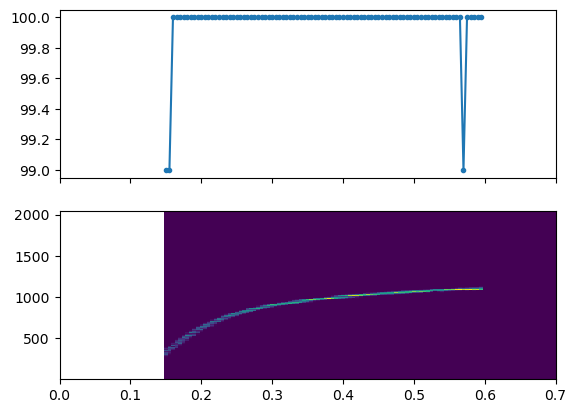

In [299]:
fraw = os.path.join(datdir,'20240315_123507_injection_scan.h5')
fhit = fraw[:-7] + 'hit.h5'

with tb.open_file(fhit) as f:
    dat = f.root.event_data[:]
## get data from raw data (scan_parameters)
with tb.open_file(fraw) as f:
    param = f.root.scan_parameters[:]

## select hits from comparator1
dat1 = dat[dat['comp']==1]
nhit1 = np.bincount(dat1['event_number']) #, minlength=len(param))

fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True)
ax[0].plot(param['inj'], nhit1, '.-')

xbins = np.arange(param['inj'][0]-(param['inj'][-1]-param['inj'][-2])/2, 
                  param['inj'][-1]+(param['inj'][-1]+param['inj'][-2])/2,
                  param['inj'][-1]-param['inj'][-2])
                  

ax[1].hist2d(param[dat1['event_number']]['inj'], dat1['tot'], 
           bins=[xbins, np.arange(1, 2048,10)]);
ax[0].set_xlim(0,0.7)

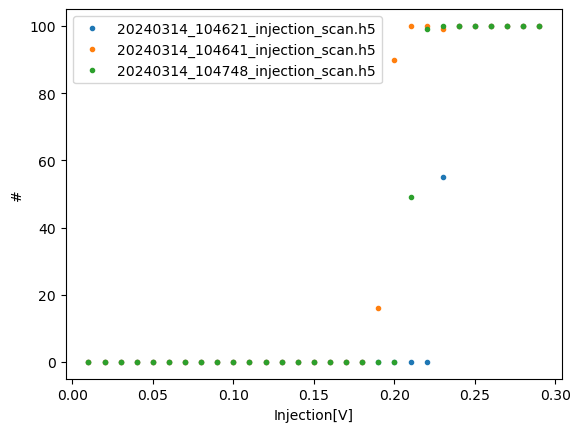

In [144]:
list_fraw = []
list_fraw.append(os.path.join(datdir, '20240314_104621_injection_scan.h5'))  # TDAC= 7 IPDAC=8 VComp2=10
list_fraw.append(os.path.join(datdir, '20240314_104641_injection_scan.h5'))  # TDAC= 0 IPDAC=8 VComp2=10
list_fraw.append(os.path.join(datdir, '20240314_104748_injection_scan.h5'))  # TDAC= 3 IPDAC=12 VComp2=16

#list_fraw.append(os.path.join(datdir, '20240308_125247_injection_scan.h5'))  # TDAC=7 IPDAC=12 VComp2=32
#list_fraw.append(os.path.join(datdir, '20240308_123703_injection_scan.h5'))  # TDAC=7 IPDAC=4
#list_fraw.append(os.path.join(datdir, '20240308_124602_injection_scan.h5'))  # TDAC=3 IPDAC=4

plot_data(list_fraw)